## Pytorch 基本教程
从组成元素上来看学习Torch主要需要熟悉以下几个概念，个人总结以下几个概念
1. 什么是Tensor？这个是深度学习框架计算的源泉，参考NumPy的array和Pandas的Dataframe。我们对于基本变量的操作主要分为如何创建？如何生成？如何复制？如何运算？如何索引？如何删除？等等操作
2. 数据的预处理，如何通过读取数据来构建自己的dataset、dataloader，并对数据进行一定的transform、随机抽取等等
3. 深度的八股：网路结构Net、优化器选择Optim、损失函数的选择Loss等等
4. 训练函数和测试函数。如何在epoch训练、如何打印loss、如何计算summary等等

## 0x01 Tensor 张量

In [22]:
import torch
import numpy as np
# 生成torch通常可以包括以下几点
# 1. 利用内置的函数 empty.ones.rand.randn.randint randperm linspace等等
# 2. 利用现有的数据，list、numpy.array、tensor等
# 3. 通过运算broadcasting,cat,join等

x =torch.empty(5,3)
x_numpy=np.zeros((5,3))

# Torch 生成随机数的种类
torch.rand(1,2) # 均匀分布
torch.randint(2,3,(2,2)) #整数分布
torch.randn(2,3) # 标准正态分布
torch.randperm(10) # 不重复随机数
torch.linspace(0,10,1) # 线性间距
torch.arange(12)
torch.poisson(torch.rand(3,5)*5) # poisson分布



tensor([[5., 0., 7., 7., 5.],
        [3., 0., 1., 6., 2.],
        [0., 8., 6., 0., 2.]])

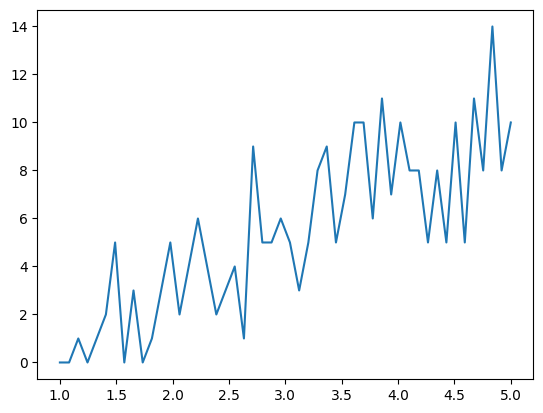

In [33]:
import matplotlib.pyplot as plt
plt.plot(torch.linspace(1,5,steps=50),torch.poisson(torch.linspace(1,10,steps=50)))

In [47]:
x=torch.randn(5,4,dtype=torch.float32)
x = torch.tensor([1,2,3,4])
x = torch.tensor(np.arange(10))
x = torch.randn(3,4)
y = torch.rand_like(x)

tensor([[0.5594, 0.8870, 0.4603, 0.5701],
        [0.7705, 0.2594, 0.8410, 0.4342],
        [0.0911, 0.8201, 0.8948, 0.1410]])

In [56]:
# Torch之间的运算
# torch默认的操作是elements和broadcasting的
X = torch.randn(3,4)
y= torch.rand(1,4)

# torch.tensor之间的可能会有三种方式：运算符号，运算函数，内在的函数
torch.add(X,y)
X.add_(y)
X+y

tensor([[0.0829, 0.2623, 0.7742, 0.9098],
        [0.0829, 0.2623, 0.7742, 0.9098],
        [0.0829, 0.2623, 0.7742, 0.9098]])

In [76]:
# 对于tensor的操作
x=torch.rand(3,4,5)
x[:,:,-1]
y=x.view(60)
z=x.view(5,12)
z
x[0,0,0].item()

# 对于tensor的reshape操作通常可以分为:名字name、维度shape和类型type
# view和reshape是在改变形状
# squeeze unsqueeze 增加维度和删减维度
# transpose permute 是变换维度
# expand repeat 维度拓展
images=torch.randn(4,1,28,28) # 4张通道数为1的28*28的图片
images_batch=images.view(4,28*28)

# 在0维度拓展维度unsqueeze，相当于将tensor放入包装盒种
images_batch.unsqueeze(0).shape


torch.Size([1, 4, 784])

In [78]:
# Tensor 的合并和分割主要包括
# concatenate 连接，作用是将2个tensor按照特定的维度连接起来，其他维度必须相同
# stack 对接起来
# split 根据长度拆分tensor
# chunk 均等分的split
a=torch.randn(3,4)
b=torch.rand(2,4)
torch.cat([a,b],dim=0)
a.split([1,2],dim=0)

(tensor([[-0.9231, -0.2478,  0.2528, -0.5609]]),
 tensor([[ 0.6755, -0.6971,  0.1847, -0.3675],
         [ 0.0055,  0.6374, -1.0256, -0.8532]]))

## 0x02 自动微分 Autograd
上述虽然给tensor的创建、索引、运算和形状改变，但其实更重要的是Torch基于此实现的自动微分机制。可能需要一些前向推理和反向传播的知识，这里需要结合tensor和gradient来介绍一些基础的知识。初步的需要了解
1. tensor中grad的激活、分割、计算等等
2. 运算


torch.Tensor是package的核心类，如果将其属性
.require_grad设置为true，则会开始跟踪tensor的所有操作，在完成计算之后，可以调用
.backward()来自动就按所有的梯度，累积到
.grad属性之中
.detach() 可以停止跟踪历史记录和内存，或者在with torch.no_grad()


In [92]:
x = torch.randn(2,2,requires_grad=True)
y=x+2
z=y*y*3
out=z.sum()
out.backward()
x.grad # 这里想当于 d(out)/d(x)

tensor([[8.7293, 6.7750],
        [6.6652, 6.3661]])

In [184]:
x=torch.randn(10,3,requires_grad=True)
b=torch.randn(3,1,requires_grad=True)
y=torch.matmul(x,b).sum()
y.backward()
b

tensor([[ 0.7735],
        [-3.0029],
        [-0.0721]], requires_grad=True)

In [185]:
x.grad

tensor([[ 0.7735, -3.0029, -0.0721],
        [ 0.7735, -3.0029, -0.0721],
        [ 0.7735, -3.0029, -0.0721],
        [ 0.7735, -3.0029, -0.0721],
        [ 0.7735, -3.0029, -0.0721],
        [ 0.7735, -3.0029, -0.0721],
        [ 0.7735, -3.0029, -0.0721],
        [ 0.7735, -3.0029, -0.0721],
        [ 0.7735, -3.0029, -0.0721],
        [ 0.7735, -3.0029, -0.0721]])

## 0x03 神经网络的搭建
1. 网络内部需要考虑 input 和 output，内部需要考虑layer和forward
2. 迭代整个输入
3. 通过神经网络处理输入
4. 计算损失 loss
5. 反向传播计算梯度
6. 更新网络的参数

In [170]:
import torch.nn as nn 
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 假设图片的输入是 1channel,5*5,6channel 输出
        self.conv1=nn.Conv2d(1,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        # 这里的16*5*5可以推理应该需要的size
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net=Net()
# Question: 这里必须要加上一个梯度
input=torch.randn(1,1,32,32,requires_grad=True)

output=net(input)

# dummy target
target=torch.rand(10)
target=target.unsqueeze(0)
criterion=nn.MSELoss()

loss=criterion(target,output)

import torch.optim as optim
optimizer=optim.SGD(net.parameters(),lr=0.01)

In [171]:
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
optimizer.zero_grad()
out=net(input)
loss=criterion(output,target)
loss.backward()
optimizer.step()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0076,  0.0070,  0.0116,  0.0181, -0.0021,  0.0141])


In [165]:
print(net.conv1.bias.grad)

tensor([ 0.0063,  0.0003,  0.0017, -0.0031,  0.0091, -0.0014])


In [129]:
help(torch.randint)

Help on built-in function randint in module torch:

randint(...)
    randint(low=0, high, size, \*, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with random integers generated uniformly
    between :attr:`low` (inclusive) and :attr:`high` (exclusive).
    
    The shape of the tensor is defined by the variable argument :attr:`size`.
    
    .. note::
        With the global dtype default (``torch.float32``), this function returns
        a tensor with dtype ``torch.int64``.
    
    Args:
        low (int, optional): Lowest integer to be drawn from the distribution. Default: 0.
        high (int): One above the highest integer to be drawn from the distribution.
        size (tuple): a tuple defining the shape of the output tensor.
    
    Keyword args:
        generator (:class:`torch.Generator`, optional): a pseudorandom number generator for sampling
        out (Tensor, optional): the output

In [98]:
# net的定义需要layer、activate function和forward的过程
# net parameter是可以知道的
list(net.parameters())

[Parameter containing:
 tensor([[[[-0.1791,  0.0751,  0.1127,  0.0834,  0.1999],
           [ 0.0023, -0.0249, -0.0809,  0.1571,  0.1962],
           [-0.1631,  0.1304,  0.1608,  0.1390,  0.0205],
           [ 0.1158,  0.0956, -0.1101, -0.0783, -0.0456],
           [ 0.1645,  0.0248, -0.0472,  0.0494, -0.0070]]],
 
 
         [[[-0.1629,  0.0371,  0.1431,  0.0419, -0.1208],
           [ 0.0215,  0.0483, -0.1241, -0.0767,  0.0072],
           [ 0.0114, -0.1011, -0.1857, -0.0607, -0.1945],
           [ 0.0154,  0.0106,  0.1098,  0.1696, -0.1399],
           [-0.0014, -0.1910,  0.0004, -0.0318,  0.1348]]],
 
 
         [[[ 0.1858,  0.1373,  0.0459,  0.1227,  0.1459],
           [-0.1126,  0.0842, -0.0827, -0.1926,  0.0205],
           [-0.0065,  0.1710,  0.1676,  0.0228, -0.0963],
           [-0.0969,  0.1969,  0.1534,  0.0079, -0.0149],
           [ 0.1163, -0.1568,  0.1624,  0.1963,  0.1508]]],
 
 
         [[[-0.1249,  0.1535,  0.1625,  0.0113,  0.1183],
           [-0.0448,  0.1258, -

In [190]:
#用net来训练CIFA10
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset=torchvision.datasets.CIFAR10(root='../data',train=True,download=False,transform=transform)


In [191]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

/Users/chenxia/.local/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/chenxia/.local/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEENS6_INS2_12MemoryFormatEEE
  Referenced from: <3F789787-FE38-3CE7-8599-064BDD0416EE> /Users/chenxia/.local/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <98993E81-78F8-3504-938B-4D1F9450D4C6> /Users/chenxia/.local/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")
/Users/chenxia/.local/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/chenxia/.local/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4

 ship plane  deer  deer


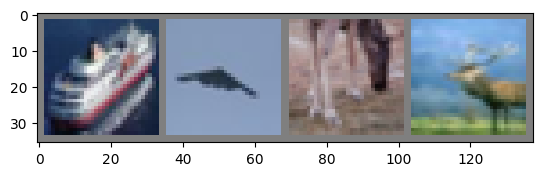

In [192]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [194]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [195]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

/Users/chenxia/.local/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/chenxia/.local/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEENS6_INS2_12MemoryFormatEEE
  Referenced from: <3F789787-FE38-3CE7-8599-064BDD0416EE> /Users/chenxia/.local/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <98993E81-78F8-3504-938B-4D1F9450D4C6> /Users/chenxia/.local/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")
/Users/chenxia/.local/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/chenxia/.local/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4

[1,  2000] loss: 2.157
[1,  4000] loss: 1.798
[1,  6000] loss: 1.665
[1,  8000] loss: 1.575
[1, 10000] loss: 1.520
[1, 12000] loss: 1.450


/Users/chenxia/.local/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/chenxia/.local/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEENS6_INS2_12MemoryFormatEEE
  Referenced from: <3F789787-FE38-3CE7-8599-064BDD0416EE> /Users/chenxia/.local/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <98993E81-78F8-3504-938B-4D1F9450D4C6> /Users/chenxia/.local/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")
/Users/chenxia/.local/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/chenxia/.local/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4

[2,  2000] loss: 1.398
[2,  4000] loss: 1.378
[2,  6000] loss: 1.351
[2,  8000] loss: 1.305
[2, 10000] loss: 1.283
[2, 12000] loss: 1.279
Finished Training


## one more thing -- CheetSheet

In [ ]:
# creating tensors
x =torch.empty(3,4)
torch.zeros(2,3)
torch.ones(2,3)
torch.manual_seed(1998)
torch.rand(4,4)
torch.rand_like(x)
torch.tensro([3,4])
torch.one((2,3),dtype=torch.int16)

torch.zeros(2,2)+1
torch.ones(2,2)*3
torch.rand(3,4)**4

# broadcasting
torch.rand(3,4)*(torch.rand(3,4)*2)
# more math with tensors
torch.abs(a)
torch.ceil(a)
torch.floor(a)
torch.clamp(a,0.5,0.5)
torch.sin(a)
torch.asin(a)
torch.bitwise_and(a,x)

torch.max()
torch.mean()
torch.std()
torch.prod()

v1 = torch.tensor([1., 0., 0.])         # x unit vector
v2 = torch.tensor([0., 1., 0.])         # y unit vector
torch.cross(v2,v1)
torch.matmul(a,x)
torch.mv(a,v2)
torch.svd(x)

In [198]:
# # moving to device
# if torch.cuda.is_available():
#     print('we have a GPU from nvidia')
# else:
#     print('Only apple can do ')
# device=torch.device('mps')
# gpu_rand=torch.rand(2,2,device=device)
# manipulating tensor shapes
a=torch.rand(3,228,228)
b=a.unsqueeze(0)
b.squeeze(0)

Only apple can do 


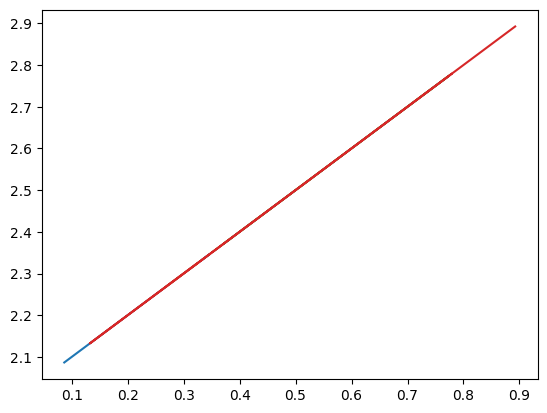

In [204]:
x=torch.rand(3,4,requires_grad=True)
y=x+2
y.sum().backward()
plt.plot(x.detach(),y.detach())
with torch.no_grad():
    y=x+2


In [ ]:
# torch.nn.Module
# torch.nn.Parameter